# Algorithms Used 

Popular algorithms that can be used for binary classification include:
- Logistic Regression
- k-Nearest Neighbors
- Decision Trees
- Support Vector Machine
- Naive Bayes

# Data and Modules

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import timedelta
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("/content/train.csv")
df_test=pd.read_csv("/content/test.csv")
ss=pd.read_csv("/content/sample_submission.csv")

In [ ]:
df.head()

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,A,80.10,material_7,material_8,9,5,7,8,4,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,1,A,84.89,material_7,material_8,9,5,14,3,3,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,2,A,82.43,material_7,material_8,9,5,12,1,5,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,3,A,101.07,material_7,material_8,9,5,13,2,6,...,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,4,A,188.06,material_7,material_8,9,5,9,2,8,...,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0


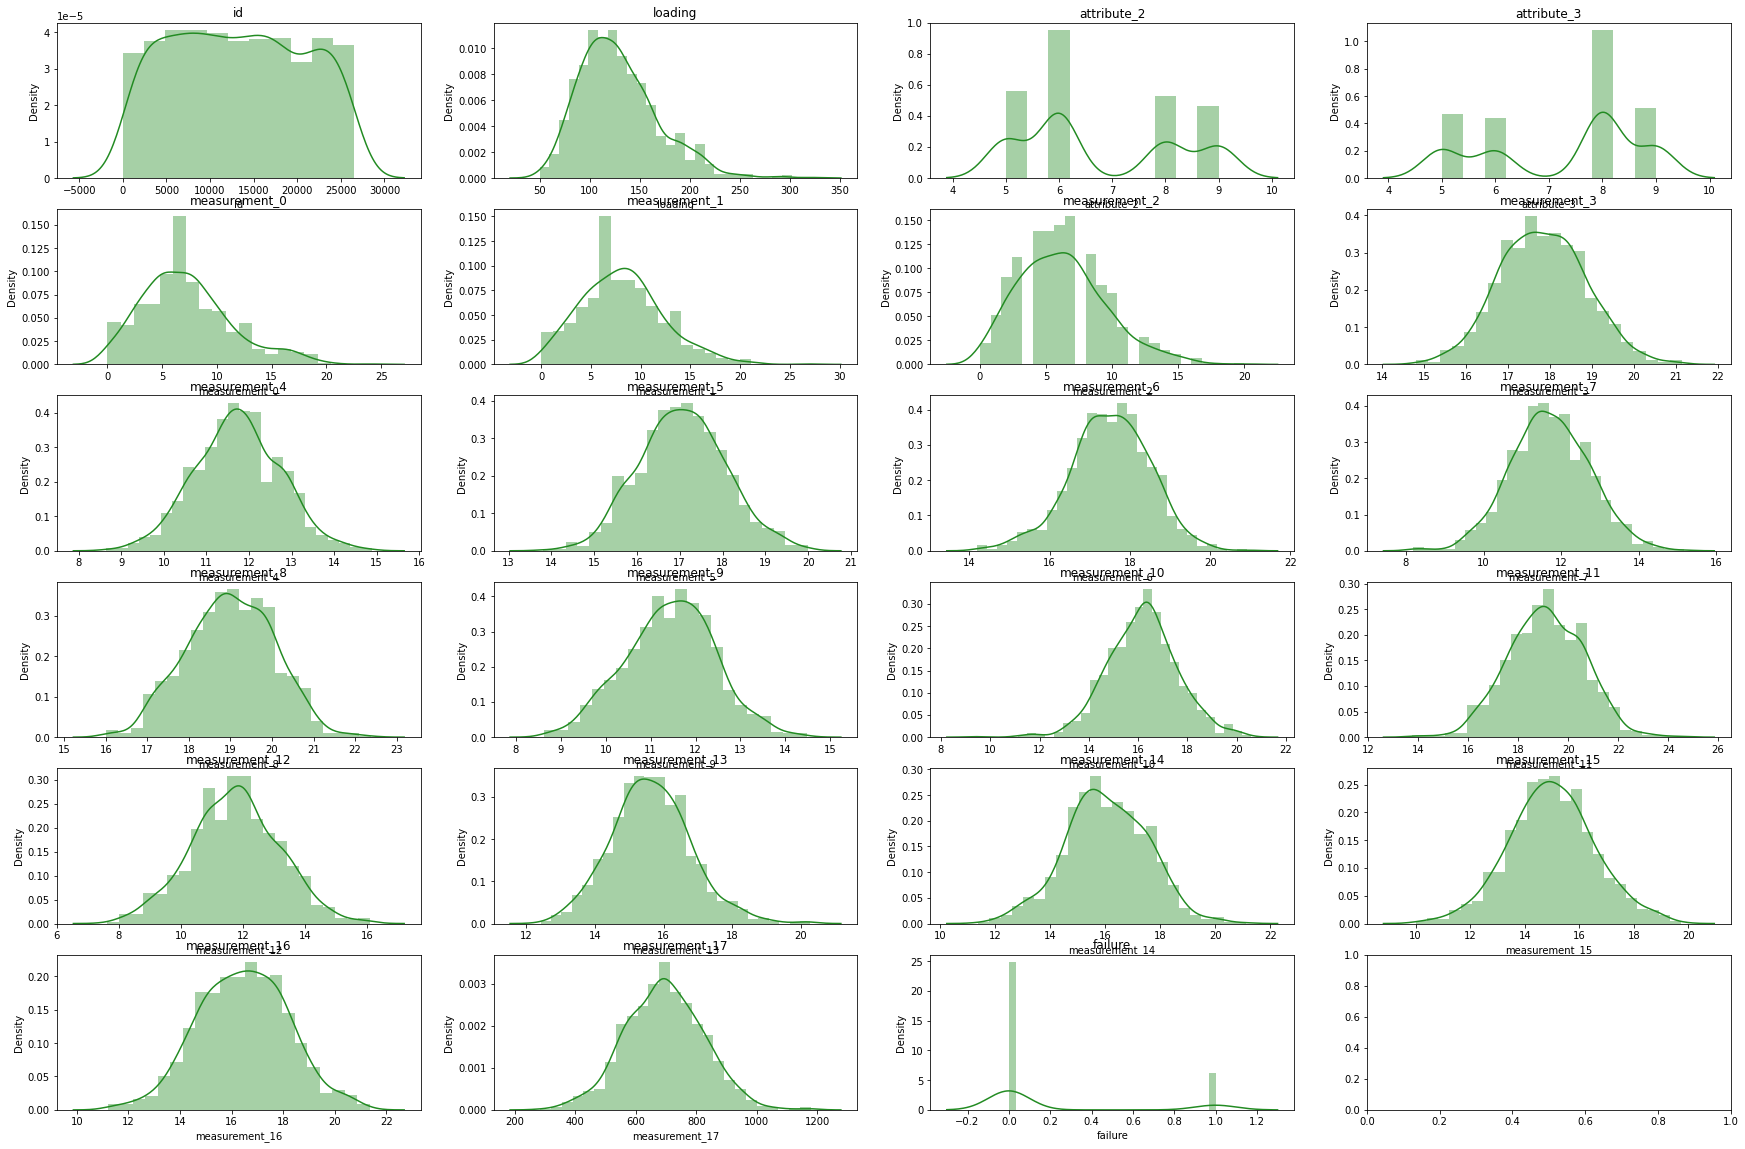

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df.select_dtypes(include=numerics)
newdf=newdf.sample(1000)


fig, axes = plt.subplots(nrows = 6, ncols = 4)    # axes is 2d array (3x3)
axes = axes.flatten()         # Convert axes to 1d array of length 9
fig.set_size_inches(30, 20)

for ax, col in zip(axes, newdf.columns):
  sns.distplot(newdf[col], ax = ax, color='forestgreen')
  ax.set_title(col)

<AxesSubplot:>

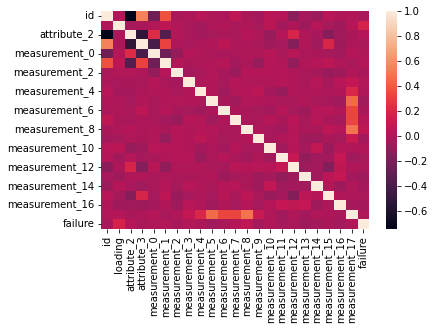

In [ ]:
sns.heatmap(newdf.corr())

In [ ]:
numerics_col_list = list(df.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns)
cat_col_list = list(set(df.columns)-set(numerics_col_list))
df=df.dropna()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

num_trans = Pipeline(steps = [('imputer', SimpleImputer(strategy='mean'))])
cat_trans = Pipeline(steps = [('imputer', SimpleImputer(strategy = 'most_frequent')),
                                       (('odi', (OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value = np.nan))))])
transformer = ColumnTransformer(transformers=[("num", num_trans, numerics_col_list),
                                           ("cat", cat_trans, cat_col_list)])
df = pd.DataFrame(transformer.fit_transform(df), columns = (numerics_col_list+cat_col_list))
df=df.drop(['id'],axis=1)
y=df['failure']
X=df.drop(['failure'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=42)

##  Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB().fit(x_train, y_train)
print("score on test: " + str(mnb.score(x_test, y_test)))
print("score on train: "+ str(mnb.score(x_train, y_train)))

score on test: 0.6946815495732108
score on train: 0.6828280617270439


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)
print("score on test: " + str(lr.score(x_test, y_test)))
print("score on train: "+ str(lr.score(x_train, y_train)))

score on test: 0.788903479973736
score on train: 0.7904126080770494


## K-Nearest Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)
knn.fit(x_train, y_train)
print("train shape: " + str(x_train.shape))
print("score on test: " + str(knn.score(x_test, y_test)))
print("score on train: "+ str(knn.score(x_train, y_train)))

train shape: (9137, 24)
score on test: 0.742284963887065
score on train: 0.8098938382401226


## Support Vector Machine

In [ ]:
from sklearn.svm import LinearSVC
svm=LinearSVC(C=0.0001)
svm.fit(x_train, y_train)
print("score on test: " + str(svm.score(x_test, y_test)))
print("score on train: "+ str(svm.score(x_train, y_train)))

score on test: 0.7895600787918582
score on train: 0.7905220531903251


## Decision Tress

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
print("score on test: "  + str(clf.score(x_test, y_test)))
print("score on train: " + str(clf.score(x_train, y_train)))

score on test: 0.6726854891661195
score on train: 1.0


## Bagging Decision Tree

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
# max_samples: maximum size 0.5=50% of each sample taken from the full dataset
# max_features: maximum of features 1=100% taken here all 10K 
# n_estimators: number of decision trees 
bg=BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5,max_features=1.0,n_estimators=10)
bg.fit(x_train, y_train)
print("score on test: " + str(bg.score(x_test, y_test)))
print("score on train: "+ str(bg.score(x_train, y_train)))

score on test: 0.7744583059750493
score on train: 0.8900076611579293


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# n_estimators = number of decision trees
rf = RandomForestClassifier(n_estimators=30, max_depth=9)
rf.fit(x_train, y_train)
print("score on test: " + str(rf.score(x_test, y_test)))
print("score on train: "+ str(rf.score(x_train, y_train)))

score on test: 0.7895600787918582
score on train: 0.7920542847761848


## Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier
# 1) naive bias = mnb
# 2) logistic regression =lr
# 3) random forest =rf
# 4) support vector machine = svm
evc=VotingClassifier(estimators=[('mnb',mnb),('lr',lr),('rf',rf),('svm',svm)],voting='hard')
evc.fit(x_train, y_train)
print("score on test: " + str(evc.score(x_test, y_test)))
print("score on train: "+ str(evc.score(x_train, y_train)))

score on test: 0.7895600787918582
score on train: 0.7905220531903251
